In [35]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Importing CSV files


df_adjust_Limits = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Continuous Data\contData_all.csv")

df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\PVs\adjust_limits.csv")


In [37]:
num_columns = df_adjust_Limits.shape[1]
print("Number of features:", num_columns)

Number of features: 17


In [38]:
# # Convert 'Date' column to datetime in df_adjust_Limits and df_LD using the appropriate format
# df_adjust_Limits['Date'] = pd.to_datetime(df_adjust_Limits['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# # Check for NaT entries in both dataframes
# nat_count_CD = df_adjust_Limits['Date'].isna().sum()

df_adjust_Limits.describe()

,425_pct_Al,M_Value,C4_pct_Eth,C4_pct_H2O,Butanol,HydWtr_pct_Ammonia,DI55152,FC55003,FC55552,FC55569,FFC55553,FFC55555,LC55555,PI55004,TC55552,TI55021
count,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000,98273.000000
mean,2.395147,3.635369,1.558450,20.597413,170.834826,0.966917,0.945530,4542.700529,26685.666138,5168.243503,8.596101,1.840044,46.668925,1.777284,140.681272,209.778479
std,156.127642,0.617018,3.690608,4.347937,805.561767,0.218032,0.058465,2656.702121,15842.226240,2671.945063,60.861316,27.554878,25.854897,1.757757,59.740052,46.420329
min,-9986.000000,0.000000,0.001000,0.057000,0.000000,0.021000,0.000000,-24.455300,-12997.800000,0.000000,0.000000,0.000000,-0.631604,-9.935260,0.000000,0.000000
25%,5.973370,3.516800,0.683690,17.973400,4.066670,0.861255,0.916380,3428.990000,17891.300000,5741.790000,0.946288,0.720669,42.359600,0.500001,142.063000,216.939000
50%,6.120560,3.606840,1.270490,20.023000,7.768330,0.934934,0.943748,5576.050000,35852.000000,6438.330000,0.988642,0.768243,55.252100,1.594820,164.566000,220.972000
75%,6.268130,3.708320,1.673360,22.774400,33.886700,1.034030,0.982439,6311.850000,38104.300000,6737.930000,1.020000,0.787397,65.156600,2.825000,178.452000,225.429000
max,8.058320,30.115400,90.136000,95.818000,36301.200000,10.726700,1.317230,20772.500000,52000.000000,12933.400000,2955.150000,1224.330000,104.971000,21.190600,213.521000,741.350000


In [39]:
# Annotate all range adjustements with rationale

#df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Data\CSV to PRocess\RangeD.csv")
df_adjustments

,Range,425 %Al,Butanol,Decanol,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FI55580,FYC55553,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,TI55565,TI90366,TI90368
0,Min,0,0,0,0,5000,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-10.0,-10.0,-4.7,0,100,100,100,0,0,0,0,0,0,0,0,0,150,0
1,Max,10,100,10,50000,50000,40000,3000,70000,70000,52000,70000,12800,1500,10,1,70000,60000,100,100,100,100,100,100,100,20.3,20.3,10.3,250.0,300,275,300,300,125,300,300,300,300,300,350,350,300,200,200


In [40]:
#Finds and removes system limit (Min/Max) values

# Assuming df_adjustments and df_adjust_Limits are your dataframes

# Extract the min and max rows from df_adjustments into separate Series
min_values = df_adjustments[df_adjustments['Range'] == 'Min'].iloc[0, 1:]
max_values = df_adjustments[df_adjustments['Range'] == 'Max'].iloc[0, 1:]

# Iterate through each column in df_adjust_Limits
for col in df_adjust_Limits.columns:
    # Check if the column exists in df_adjustments
    if col in min_values.index:
        # Get the min and max values for this column from df_adjustments
        min_val = min_values[col]
        max_val = max_values[col]
        
        # Filter out values in df_adjust_Limits that are less than min or greater than max
        df_adjust_Limits.loc[df_adjust_Limits[col] < min_val, col] = None
        df_adjust_Limits.loc[df_adjust_Limits[col] > max_val, col] = None


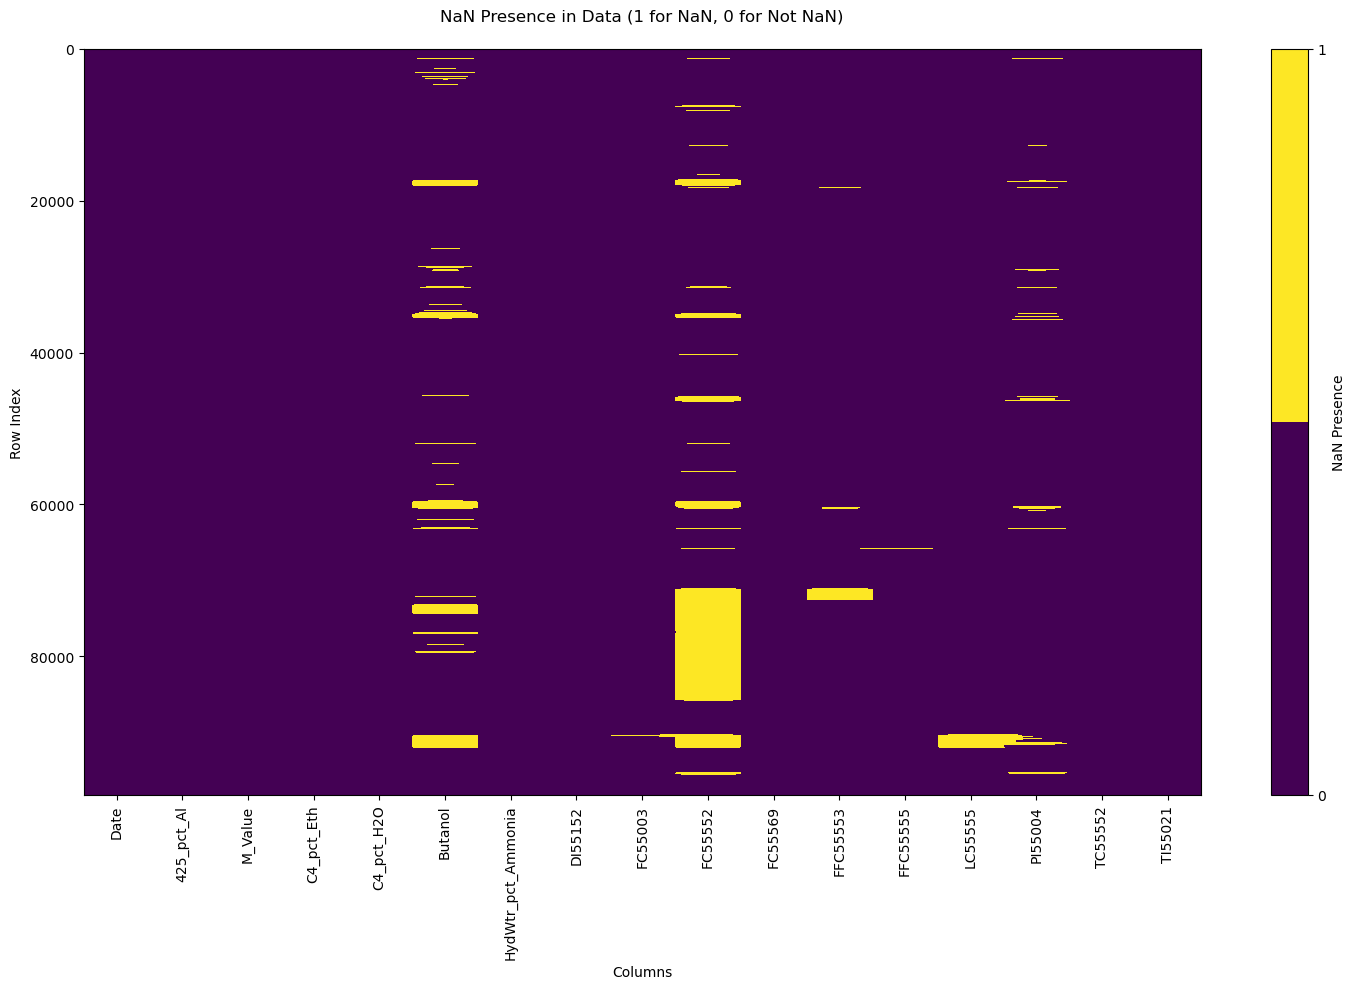

In [41]:
# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_adjust_Limits.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_adjust_Limits.shape[1]), df_adjust_Limits.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()

In [42]:
# Calculate the statistics for each column in df_adjust_Limits
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       98273          98273          0        0.000000
1           425_pct_Al       98273          98273          0        0.000000
2              M_Value       98273          98273          0        0.000000
3           C4_pct_Eth       98273          98273          0        0.000000
4           C4_pct_H2O       98273          98273          0        0.000000
5              Butanol       98273          82605      15668       15.943342
6   HydWtr_pct_Ammonia       98273          98273          0        0.000000
7              DI55152       98273          98273          0        0.000000
8              FC55003       98273          98026        247        0.251341
9              FC55552       98273          74545      23728       24.144984
10             FC55569       98273          98269          4        0.004070
11            FFC55553       98273          94730       3543        3.605263

In [43]:
#Analysis of remaining NaNs suggests minimal impact - REMOVE

df_adjust_Limits = df_adjust_Limits.dropna()

# Calculate the statistics for each column in df_pivot
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       66814          66814          0             0.0
1           425_pct_Al       66814          66814          0             0.0
2              M_Value       66814          66814          0             0.0
3           C4_pct_Eth       66814          66814          0             0.0
4           C4_pct_H2O       66814          66814          0             0.0
5              Butanol       66814          66814          0             0.0
6   HydWtr_pct_Ammonia       66814          66814          0             0.0
7              DI55152       66814          66814          0             0.0
8              FC55003       66814          66814          0             0.0
9              FC55552       66814          66814          0             0.0
10             FC55569       66814          66814          0             0.0
11            FFC55553       66814          66814          0             0.0

In [44]:
# 73745

df_adjust_Limits = df_adjust_Limits.sort_values('Date')
df_adjust_Limits = df_adjust_Limits.reset_index(drop=True)


# Save DataFrame to CSV file in the same directory as the Jupyter Notebook
df_adjust_Limits.to_csv('adjusted_Limits.csv', index=False)

In [45]:
df_adjust_Limits.describe()



,425_pct_Al,M_Value,C4_pct_Eth,C4_pct_H2O,Butanol,HydWtr_pct_Ammonia,DI55152,FC55003,FC55552,FC55569,FFC55553,FFC55555,LC55555,PI55004,TC55552,TI55021
count,66814.000000,66814.000000,66814.000000,66814.000000,66814.000000,66814.000000,66814.000000,6.681400e+04,66814.000000,66814.000000,66814.000000,66814.000000,66814.000000,66814.000000,66814.000000,66814.000000
mean,4.335104,3.637638,1.448415,20.983292,11.560786,0.987209,0.943680,5.948377e+03,35341.550491,6614.274132,0.989798,0.773793,58.715883,2.351955,167.817923,223.977927
std,109.236487,0.732475,2.697047,4.421187,15.599728,0.204888,0.042955,1.033866e+03,5505.443684,481.872839,0.059929,0.027328,10.579809,1.324980,15.894613,10.872105
min,-9730.860000,0.571967,0.001000,0.057000,0.000000,0.063109,0.000000,1.930000e-17,6376.690000,0.000000,0.042564,0.000000,0.000000,0.000000,98.687500,0.000000
25%,5.991390,3.508332,0.684172,18.337725,3.571670,0.877390,0.915073,5.377163e+03,33955.800000,6343.130000,0.969304,0.759333,49.872600,1.319260,155.458000,217.887000
50%,6.137015,3.598720,1.304895,20.819850,5.750000,0.946312,0.939149,5.953580e+03,37561.400000,6574.400000,0.991472,0.777559,60.172050,2.084360,171.453000,221.101000
75%,6.291750,3.700338,1.764115,22.998775,11.510000,1.049028,0.965686,6.530233e+03,38953.300000,6826.135000,1.016637,0.790018,67.836200,3.172285,180.307000,225.231750
max,8.058320,30.115400,77.165000,95.818000,99.950000,3.744840,1.070140,1.470590e+04,52000.000000,10503.000000,1.475490,1.000000,99.818500,12.531800,213.521000,344.636000


In [46]:
# 61183 - Alc samples and Niro removed